In [1]:
import math
# 计算欧式距离
def L(x,y,p=2):
    if len(x) == len(y):
        if len(x) == 1:
            return abs(x[0] - y[0])
        else:
            sum = 0
            for i in range(len(x)):
                sum += math.pow(abs(x[i] - y[i]),p)
            return math.pow(sum,1/p)
    else:
        return 0

In [2]:
x1 = [1,1]
x2 = [5,1]

print(L(x1,x2))

4.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [4]:
iris = load_iris()
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df['label'] = iris.target
df.columns = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']
df.head()

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


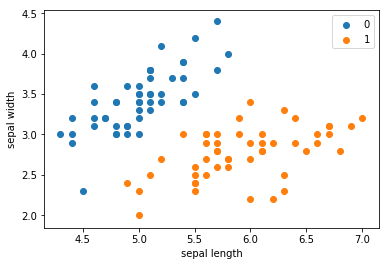

In [5]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [25]:
len(df)

150

In [6]:
# 为了方便，只取sepal length列和sepal width列，label列也取出来
data = np.array(df.iloc[:100,[0,1,-1]])
X,y = data[:,:-1],data[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [30]:
# 建立KNN列
class KNN:
    def __init__(self,X_train,y_train,n_neighbours=3,p=2):
        self.n = n_neighbours
        self.p = p
        self.X_train = X_train
        self.y_train = y_train
        self.X_norm,self.ranges,self.min_vals = self.auto_norm(self.X_train)
        
    # 归一化，自己写    
    def auto_norm(self,data_set):
        min_vals = data_set.min(0)
        max_vals = data_set.max(0)
        ranges = max_vals - min_vals
        m,n = data_set.shape
        norm_data = data_set - np.tile(min_vals,(m,1))
        norm_data = norm_data/np.tile(ranges,(m,1))
        return norm_data,ranges,min_vals
    
    def predict(self,X):
        data_size = self.X_train.shape[0]
        norm_x = (X-self.min_vals)/(self.ranges)
        diff_mat = np.tile(norm_x,(data_size,1)) - self.X_norm
        sqDiffMat = diff_mat ** self.p
        sq_distances = sqDiffMat.sum(axis = 1)
        distances = sq_distances ** (1/self.p)
        sorted_index = distances.argsort()
        class_count = dict()
        for i in range(self.n):
            vote_label = self.y_train[sorted_index[i]]
            class_count[vote_label] = class_count.get(vote_label,0) + 1
        sorted_tuple_list = sorted(class_count.items(),key = lambda key:key[1],reverse=True)
        return sorted_tuple_list[0][0]
    
    def score(self,X_test,y_test):
        sum_number = len(X_test)
        right_count = 0
        for X,y in zip(X_test,y_test):
            label = self.predict(X)
            #print(label)
            if label == y:
                right_count += 1
        return right_count/sum_number

In [31]:
clf = KNN(X_train, y_train)

In [32]:
clf.score(X_test, y_test)

1.0

In [33]:
test_point = [6.0, 3.0]
print('Test Point: {}'.format(clf.predict(test_point)))

Test Point: 1.0


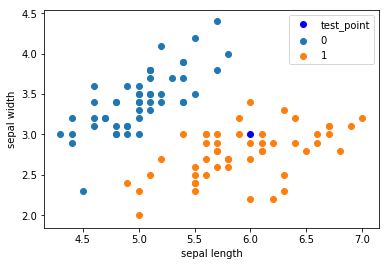

In [35]:
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'], label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'], label='1')
plt.plot(test_point[0], test_point[1], 'bo', label='test_point')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [34]:
from sklearn.neighbors import KNeighborsClassifier

clf_sk = KNeighborsClassifier()
clf_sk.fit(X_train, y_train)

clf_sk.score(X_test, y_test)

1.0

#### kd树
    1.创建kd树，首先kd树就是一个二叉树，按照纬度上的值将该区域分成两个子区域，每个节点都存储一个数据点
    2.搜索kd树，如何搜索，先找到在同一个区域的子节点，然后回溯查找

In [47]:
class KdNode:
    def __init__(self,dom_elet,split,left,right):
        # k维向量节点（k维空间中的一个样本点）
        self.dom_elet = dom_elet
        # 进行分割纬度的序号
        self.split = split
        # 该节点分割超平面左子空间构成的kd tree
        self.left = left
        # 该节点分割超平面右子空间构成的kd tree
        self.right = right
        
class kdTree:
    def __init__(self,data):
        # 数据纬度
        k = len(data[0])
        
        # 按照split维划分数据集合来创建kdNode
        def create_node(split,data_set):
            if not data_set:
                return None
            # 将data_set按照split维进行排序
            data_set.sort(key = lambda x:x[split])
            split_pos = len(data_set)//2
            median = data_set[split_pos]
            split_next = (split + 1) % k
            return KdNode(
                median,
                split,
                create_node(split_next,data_set[:split_pos]),
                create_node(split_next,data_set[split_pos + 1:])
                )
        self.root = create_node(0,data)

In [48]:
# kd树的前序遍历
def preorder(root):
    print(root.dom_elet)
    if root.left:
        preorder(root.left)
    if root.right:
        preorder(root.right)

In [49]:
data = [[2,3],[5,4],[9,6],[4,7],[8,1],[7,2]]
kd = kdTree(data)
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


#### 临近搜索
给定一个kdTree和一个节点，求kdTree中离这个节点最近的节点
#### 基本思路
&emsp;&emsp;首先通过二叉搜索（比较代查询节点和分裂节点的分裂维的值，小于等于就进入左子树分支，大于就进入右子树分支直到叶子节点），顺着搜索路径很快就能找到最近临的近似点，也就是与代查询点处于同一个子空间的叶子节点；然后在回溯搜索路径，并判断搜索路径上的节点的其他子节点空间是否可能是距离查询点更近的数据点，如果有可能，则需要跳到其他子节点空间中搜索（将其他子节点加入到搜索路径）。重复这个过程直到搜索路径为空

&emsp;&emsp;在回溯的过程中，需要一个队列，存储需要回溯的点，在判断其他子节点空间中是否有可能有距离查询点更近的数据点时，做法是以查询点为圆心，以当前的最近距离为半径画圆，这个圆成为候选超球，如果圆与回溯点的轴相交，则需要将轴的另一边的节点都放到回溯队列中。

#### 例子
假设现有kd树如下

              (7,2) - x
             /     \
          (5,4)    (9,6)  -y
          /  \       /
       (2,3) (4,7) (8,1)   -x
       
    查找点(2,4.5),怎么做？
    1.首先从根节点开始，可以根据二叉树得知，(2,4.5)会在(7,2)处测试到达(5,4),此时记录max_dist = L((7,2),(2,4.5)),nearest_node = (7,2)
    2.走到(5,4)节点处，首先计算(2,4.5)和(5,4)的L距离 < |7-2|,因此(7,2)的右子树不必加入到queue_list,然后根据二叉树走到(4,7)
    3.(4,7)是叶子节点，不能在往下走了，首先计算(2,4.5)和(4,7)的L 距离 > |5-3|,因此(5,4)的左子树需要检查，加入到queue_list中，然后比较，最后得到一个最近节点

In [92]:
# 对构建好的kd树进行搜索，寻找与目标点最近的样本点
from math import sqrt
from collections import namedtuple

# 定义一个对象，存储 最近坐标点，最近距离，访问过的节点数
result = namedtuple('Result_tuple',['nearest_point', 'nearest_dist', 'nodes_visited'])


def find_nearest(tree,point):
    # 数据维度
    k = len(point)
    
    # 这个是一个递归函数，参数是kd_node,target，和当前的最小距离
    def travel(kd_node,target,min_dist):
        '''
        思路：首先是递归函数，返回的是一个对象，包含最近坐标点，最近距离，以及访问过的节点数
        
        1.首先确定的是该函数的含义是返回以kd_node为根的子树中距离target节点最近的节点
        2.首先可以确定target在kd_node的左子树或者右子树，但同时保留另一个子树
        3.调用temp_node = travel(kd_node.left,target,min_dist)，假设target在kd_node.left中，同时保留kd_node.right
        4.首先确定temp_node与target的距离l1 和 temp_node和kd_node在维度s上的距离l2
            1.if l1 < l2:说明超球体和超平面不相交，因此可以直接返回temp_node
            2.if l1 >= l2:说明超球体和超平面相交
                1.首先需要判断kd_node是否是离target_node更近的节点
                2.然后调用temp_node2 = travel(kd_node.right,target,min_dist)
                3.判断temp_node 和 temp_node2 哪个更近
        
        
        '''
        if kd_node is None:
            return result([0] * k,float('inf'),0)
        
        nodes_visited = 1
        # 切割的维度
        s = kd_node.split
        # 进行分割的节点
        pivot = kd_node.dom_elet
        
        # 判断target 应该在kd_node的左子树还是右子树
        if target[s] <= pivot[s]:
            # next_node 记录下一个访问节点
            # further_node 记录下一个访问节点的兄弟节点
            next_node = kd_node.left
            further_node = kd_node.right
        else:
            next_node = kd_node.right
            further_node = kd_node.left
            
        # 找到以next_node为根节点的离target的最近节点信息    
        temp_node_1 = travel(next_node,target,min_dist)
        
        # 以此‘叶节点’作为当前最近节点
        nearest_node = temp_node_1.nearest_point
        dist = temp_node_1.nearest_dist
        
        nodes_visited += temp_node_1.nodes_visited
        
        # 最近点将以目标点为求心，min_dist为半径的超球体内
        if dist < min_dist:
            min_dist = dist
            
        
        # 第s维上目标点与分割超平面的距离
        s_dist = abs(pivot[s] - target[s])
        # 如果超球体与超平面不相交
        if min_dist < s_dist:
            #print(result(nearest_node,dist,nodes_visited))
            return result(nearest_node,dist,nodes_visited)
        else:
            # 相交
            # 计算目标点与分割点的欧式距离
            # 首先判断pivot是否是离target更近的节点
            pivot_dist = sqrt(sum((p1 - p2)**2 for p1,p2 in zip(pivot,target)))
            
            if pivot_dist < dist:
                nearest_node = pivot
                dist = pivot_dist
                min_dist = dist
            # 检查kd_node的另一个子区域是否有更近的节点
            temp_node_2 = travel(further_node,target,min_dist)
            nodes_visited += temp_node_2.nodes_visited
            if temp_node_2.nearest_dist < dist:
                nearest_node = temp_node_2.nearest_point
                dist = temp_node_2.nearest_dist
            #print(result(nearest_node,dist,nodes_visited))
            return result(nearest_node,dist,nodes_visited)
    return travel(tree.root,point,float('inf'))

In [93]:
ret = find_nearest(kd, [3,4.5])
print(ret)

Result_tuple(nearest_point=[2, 3], nearest_dist=1.8027756377319946, nodes_visited=4)


In [77]:
preorder(kd.root)

[7, 2]
[5, 4]
[2, 3]
[4, 7]
[9, 6]
[8, 1]


In [60]:
result = namedtuple('Result_tuple',['point', 'dist', 'visited'])

In [70]:
s = result([0],float('inf'),0)

In [71]:
print(s)

Result_tuple(nearest_point=[0], nearest_dist=inf, nodes_visited=0)


In [94]:
from time import clock
from random import random

# 产生一个k维随机向量，每维分量值在0~1之间
def random_point(k):
    return [random() for _ in range(k)]
 
# 产生n个k维随机向量 
def random_points(k, n):
    return [random_point(k) for _ in range(n)]


N = 400000
t0 = clock()
kd2 = kdTree(random_points(3, N))            # 构建包含四十万个3维空间样本点的kd树
ret2 = find_nearest(kd2, [0.1,0.5,0.8])      # 四十万个样本点中寻找离目标最近的点
t1 = clock()
print ("time: ",t1-t0, "s")
print (ret2)

time:  5.0958309999999996 s
Result_tuple(nearest_point=[0.09501596996460637, 0.500216161590213, 0.7934251754615785], nearest_dist=0.008253217490034954, nodes_visited=72)
